# 3.0 Pre-Processing

---

# Contents

- [1.0 Daily Data](#1.0-Daily-Data)
    - [1.1 Load Data](#1.1-Load-Data)
    - [1.2 Check Stationarity](#1.2-Check-Stationarity)
    - [1.3 Auto Regression trends](#1.3-Auto-Regression-trends)
        - [1.3.1 ACF](#1.3.1-ACF)
        - [1.3.2 PACF](#1.3.2-PACF)
    - [1.4 Check Seasonality](#1.4-Check-Seasonality)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot

import plotly.graph_objects as go


In [2]:
pd.set_option('display.max_columns', None)

---

# 1.0 Daily Data

---

## 1.1 Load Data

In [25]:
daily_test = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/resampled/eur-usddaily.csv', 
                      index_col='date', parse_dates=True)

In [26]:
daily_test.shape

(4612, 51)

In [27]:
daily_test.head()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-14,0.9353,0.9389,0.9318,0.9383,0.93680,0.94522,0.948145,0.003250,0.003387,-0.016431,-0.014102,-0.017514,0.0030,0.0062,0.0086,0.0041,1.0,97.4,122.0,0,0.0,-1.0,-1.0,0.9416,0.9503,0.9545,0.9425,0.9517,0.9569,0.9330,0.9396,0.9496,0.9354,0.9417,0.9504,0.9382,0.9402,0.9342,0.9360,0.9368,0.9227,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9413,0,0.9402,2000-07-21
2000-07-17,0.9382,0.9402,0.9342,0.9360,0.93710,0.94217,0.947100,0.004282,0.003440,-0.009408,-0.016013,-0.014875,0.0022,0.0030,0.0062,0.0086,-1.0,98.1,123.3,0,-1.0,0.0,-1.0,0.9353,0.9416,0.9503,0.9389,0.9425,0.9517,0.9318,0.9330,0.9396,0.9383,0.9354,0.9417,0.9361,0.9368,0.9227,0.9256,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9338,0,0.9193,2000-07-24
2000-07-18,0.9361,0.9368,0.9227,0.9256,0.93085,0.93785,0.945633,0.003582,0.003797,-0.008151,-0.022678,-0.020519,0.0105,0.0022,0.0030,0.0062,-1.0,98.3,123.8,-1,0.0,0.0,0.0,0.9382,0.9353,0.9416,0.9402,0.9389,0.9425,0.9342,0.9318,0.9330,0.9360,0.9383,0.9354,0.9255,0.9270,0.9193,0.9246,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9151,0,0.9193,2000-07-25
2000-07-19,0.9255,0.9270,0.9193,0.9246,0.92505,0.93366,0.944207,0.003915,0.003618,-0.012543,-0.022146,-0.029125,0.0009,0.0105,0.0022,0.0030,-1.0,97.0,123.3,0,1.0,-1.0,0.0,0.9361,0.9382,0.9353,0.9368,0.9402,0.9389,0.9227,0.9342,0.9318,0.9256,0.9360,0.9383,0.9245,0.9342,0.9204,0.9325,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9237,0,0.9204,2000-07-26
2000-07-20,0.9245,0.9342,0.9204,0.9325,0.92850,0.93166,0.943221,0.005881,0.004167,-0.009177,-0.010655,-0.024531,0.0080,0.0009,0.0105,0.0022,1.0,97.1,123.3,1,0.0,0.0,-1.0,0.9255,0.9361,0.9382,0.9270,0.9368,0.9402,0.9193,0.9227,0.9342,0.9246,0.9256,0.9360,0.9324,0.9384,0.9319,0.9365,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9405,0,0.9450,2000-07-27


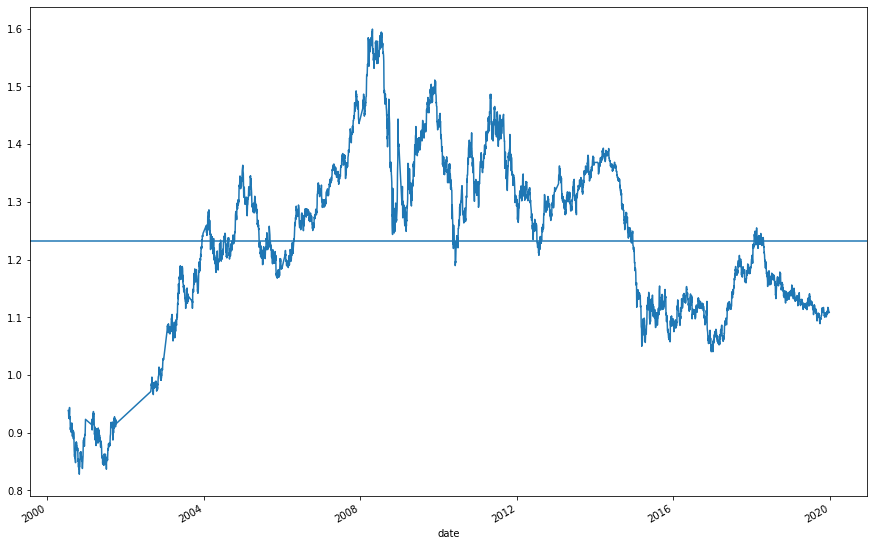

In [28]:
plt.figure(figsize=(15,10))
daily_test['close'].plot()
plt.axhline(y=daily_test['close'].mean());

In [29]:
daily_test.isnull().sum()

open                 0
high                 0
low                  0
close                0
mid                  0
wk_mv_avg            0
mnth_mv_avg          0
volatility_3_day     0
volatility_10_day    0
pct_chge_3_prds      0
pct_chge_5_prds      0
pct_chge_10_prds     0
height               0
height-1             0
height-2             0
height-3             0
direction            0
gold_usd             0
gold_euro            0
marubozu             0
marubozu+1           0
marubozu-1           0
marubozu-2           0
day-1_open           0
day-2_open           0
day-3_open           0
day-1_high           0
day-2_high           0
day-3_high           0
day-1_low            0
day-2_low            0
day-3_low            0
day-1_close          0
day-2_close          0
day-3_close          0
day+1_open           0
day+1_high           0
day+1_low            0
day+1_close          0
day+2_high           0
day+2_low            0
day+3_high           0
day+3_low            0
day+4_high 

In [30]:
# nulls because data not available for prior time frames

# 1.2 Check Stationarity

In [31]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [32]:
interpret_dftest(adfuller(daily_test['close']))

Test Statistic   -2.172532
p-value           0.216365
dtype: float64

### Observation

+ P-value shows that it is not under our 0.05 threshold so we cant reject the null hypothesis that the data is not stationary.

+ Therefore we need to difference

In [33]:
# Write a for loop to find the lowest difference value d, when it meets our criteria of belown 
# the 0.05 threshold we can reject out null hypothesis and the data can be considered stationary.

# Iterate through all possible differences.
for d in range(1, 10):
    
    # Keep track of the result of each difference
    print(f'Check difference of {d}.')
    print(f'p-value = {interpret_dftest(adfuller(daily_test["close"].diff(d).dropna()))["p-value"]}')
          
    # Print succesful 
    if interpret_dftest(adfuller(daily_test['close'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'Need to difference the data by d={d} to have confirm its stationary')
        break
    
    print()

Check difference of 1.
p-value = 0.0
Need to difference the data by d=1 to have confirm its stationary


### Obsevation
+ Need to a difference of one to become a stationary dataset

---

## 1.3 Auto Regression trends

### 1.3.1 ACF

#### AR or Autoregression

+ This is where we see how much correlation the data has with itself.
+ The AR part of the model is used for looking at long term trends
+ I'll look at the Autocorrelation plot to see look for any significant correlation

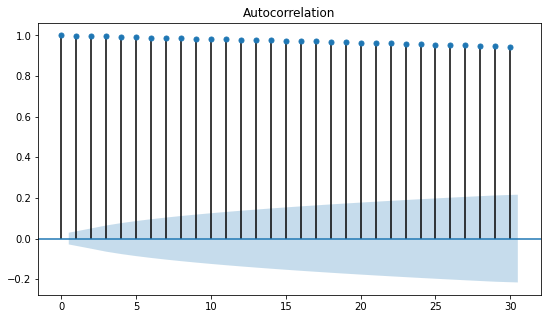

In [34]:
# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_acf(daily_test["close"], lags=30, ax=ax);

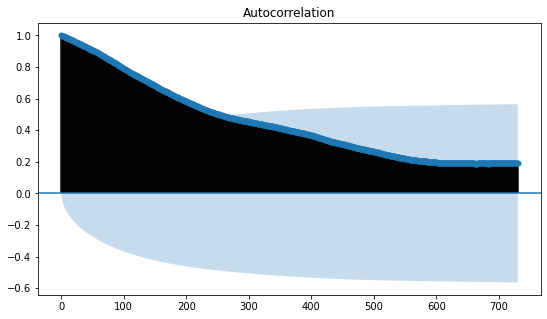

In [35]:
# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_acf(daily_test["close"], lags=730, ax=ax);

#### Observation

+ The data is highly correlated
+ only after about 1 year does the data become uncorrelated.

---

### 1.3.2 PACF

#### Partial Autocorrelation Plot

+ I'll look at the Partial Autocorrelation plot
+ This takes into account the correlation already been accounted for in the previous time step

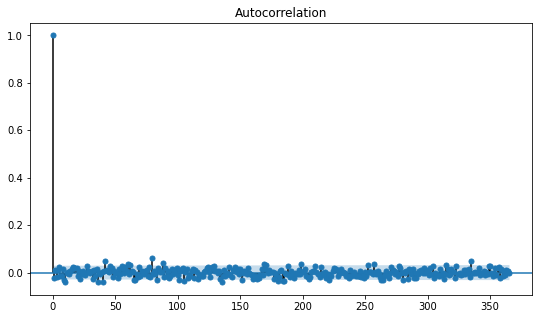

In [36]:
# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_acf(daily_test["close"].diff(1).dropna(), lags=365, ax=ax);

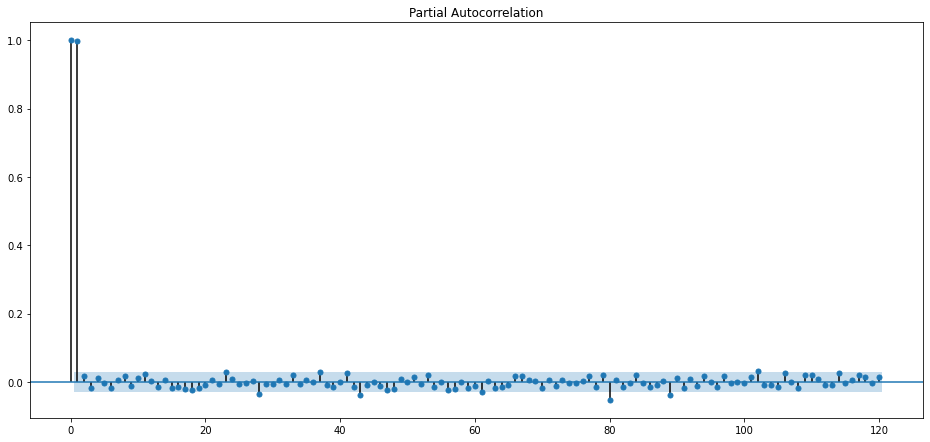

In [37]:
# 1 day  Autocorr and Partial Autocorr
fig = plt.figure(figsize=(16,16))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(daily_test['close'], lags=120, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(daily_test['close'], lags=120, ax=ax2);


#### Observation

+ I would choose to have p as 1 in my model as there is sharp drop off and lag -1 has a positive value

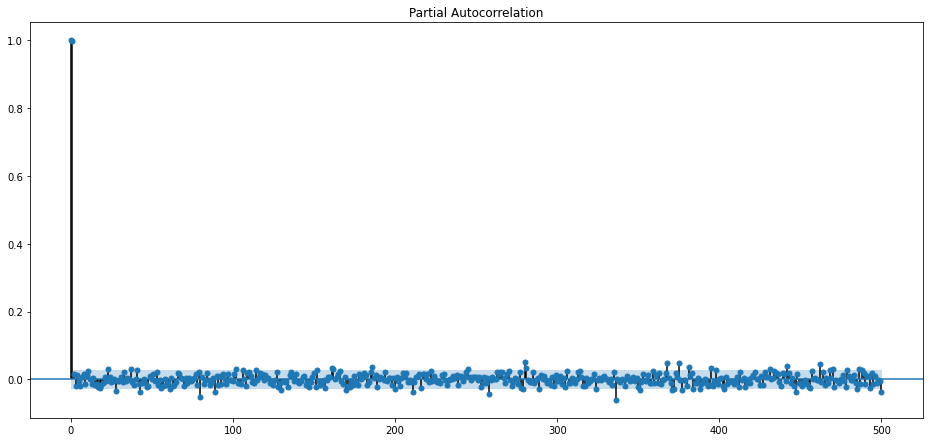

In [38]:
# 1 day  Autocorr and Partial Autocorr
fig = plt.figure(figsize=(16,16))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(daily_test['close'], lags=120, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(daily_test['close'], lags=500, ax=ax2);


---

---

## 1.4 Check Seasonality

In [39]:
print(f'Autocorrelation between day price and 1-lag close proce: {round(daily_test["close"].autocorr(lag=1),4)}')
print(f'Autocorrelation between day price and 14-lag close price: {round(daily_test["close"].autocorr(lag=14),4)}')
print(f'Autocorrelation between day price and 30-lag close price: {round(daily_test["close"].autocorr(lag=30),4)}')
print(f'Autocorrelation between day price and 120-lag close price: {round(daily_test["close"].autocorr(lag=120),4)}')

Autocorrelation between day price and 1-lag close proce: 0.9987
Autocorrelation between day price and 14-lag close price: 0.9823
Autocorrelation between day price and 30-lag close price: 0.9608
Autocorrelation between day price and 120-lag close price: 0.8108


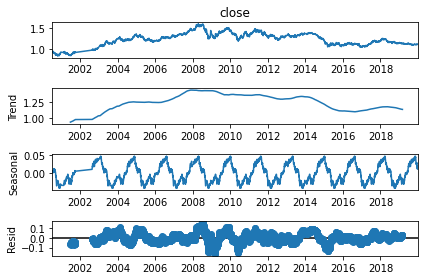

In [40]:
decomposition = seasonal_decompose(daily_test['close'], period=420)  
decomposition.plot();

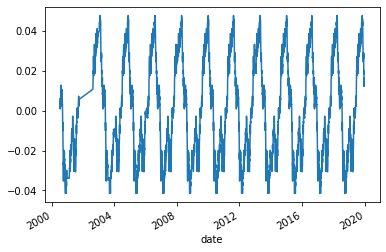

In [41]:
seasonal = decomposition.seasonal 
seasonal.plot()

In [42]:
# Define a Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    # Determining rolling statistics:
    rolmean = timeseries.rolling(window=60, center=False).mean()
    rolstd = timeseries.rolling(window=60, center=False).std()

    # Plotting rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = timeseries.plot(color='blue',label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing a Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    print(dfoutput )

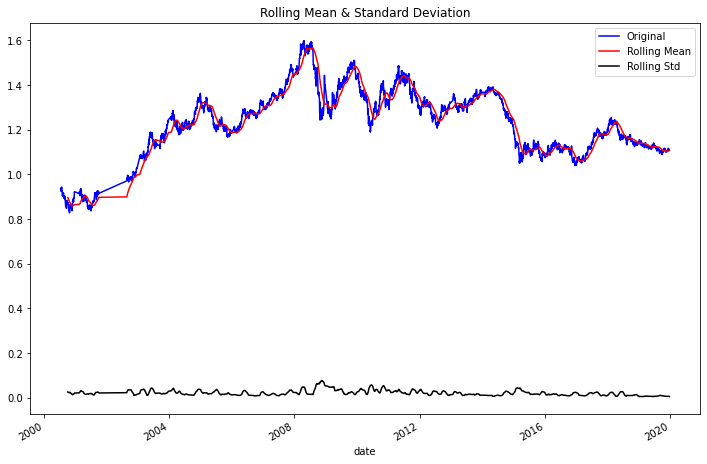

Results of Dickey-Fuller Test:
Test Statistic   -2.172532
p-value           0.216365
dtype: float64


In [43]:
# Perform the test.
test_stationarity(daily_test['close'])

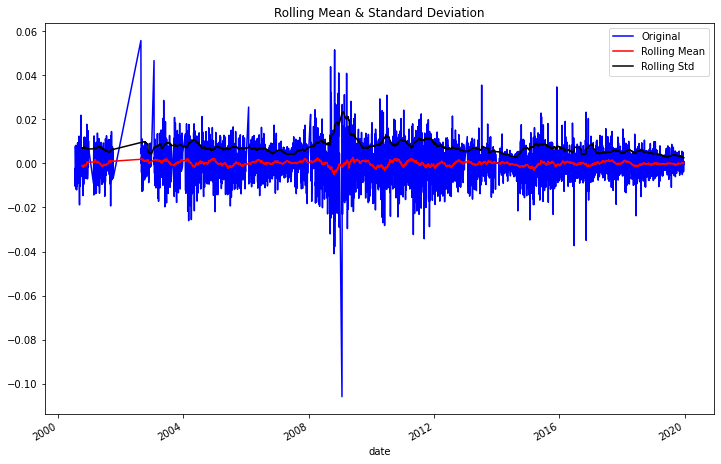

Results of Dickey-Fuller Test:
Test Statistic   -22.686706
p-value            0.000000
dtype: float64


In [44]:
# Seasonal difference:
daily_test['seasonal_difference'] = daily_test['close'].diff(1)  
test_stationarity(daily_test.seasonal_difference.dropna())

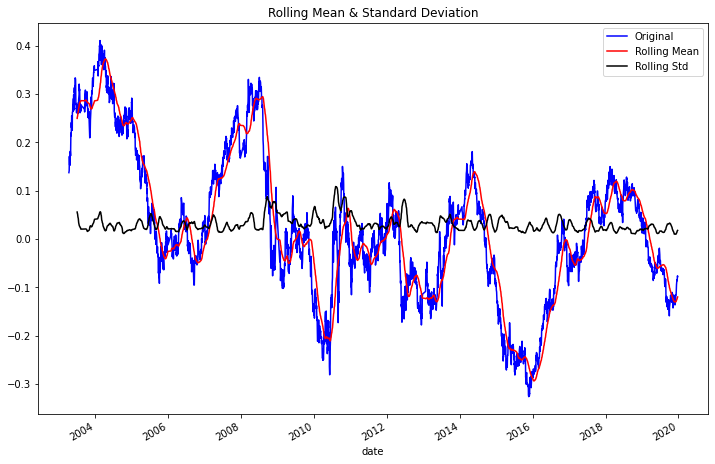

Results of Dickey-Fuller Test:
Test Statistic   -2.390659
p-value           0.144390
dtype: float64


In [45]:
# Seasonal difference:
daily_test['seasonal_difference'] = daily_test['close'].diff(422)  
test_stationarity(daily_test.seasonal_difference.dropna())

---

---